In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/credit.csv')

### **Data Understanding**

In [ ]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
data.shape

(100000, 28)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
data.select_dtypes('object').columns

Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [ ]:
data.select_dtypes('float64').columns

Index(['Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

In [ ]:
data.select_dtypes('int64').columns

Index(['ID', 'Customer_ID', 'Month'], dtype='object')

The dataset contain 7 categorical columns and 21 numerical columns





In [ ]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### **Exploratory Data Analysis**

In [ ]:
credit_score_counts = data['Credit_Score'].value_counts()
credit_score_counts

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

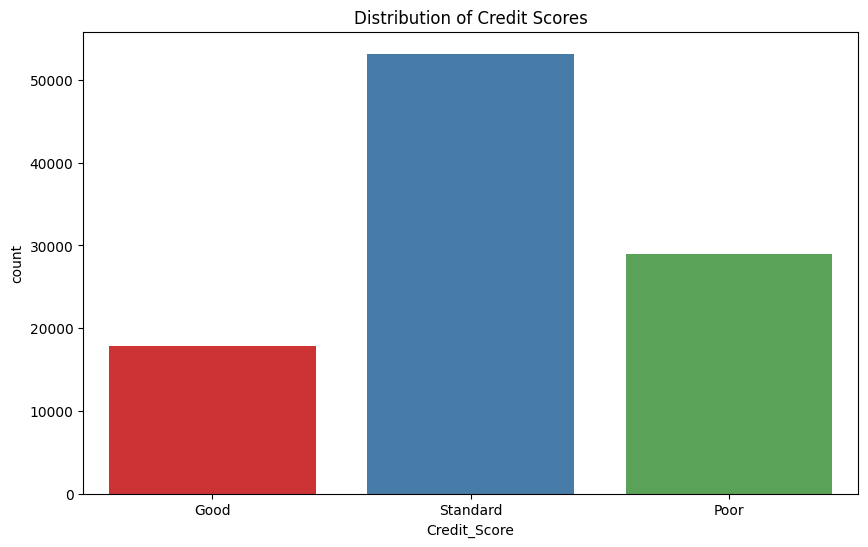

In [ ]:
# Distribution of the target variable 'credit_score'

plt.figure(figsize = (10, 6))
sns.countplot(x = 'Credit_Score', data = data, palette = 'Set1')
plt.title('Distribution of Credit Scores')
plt.show()

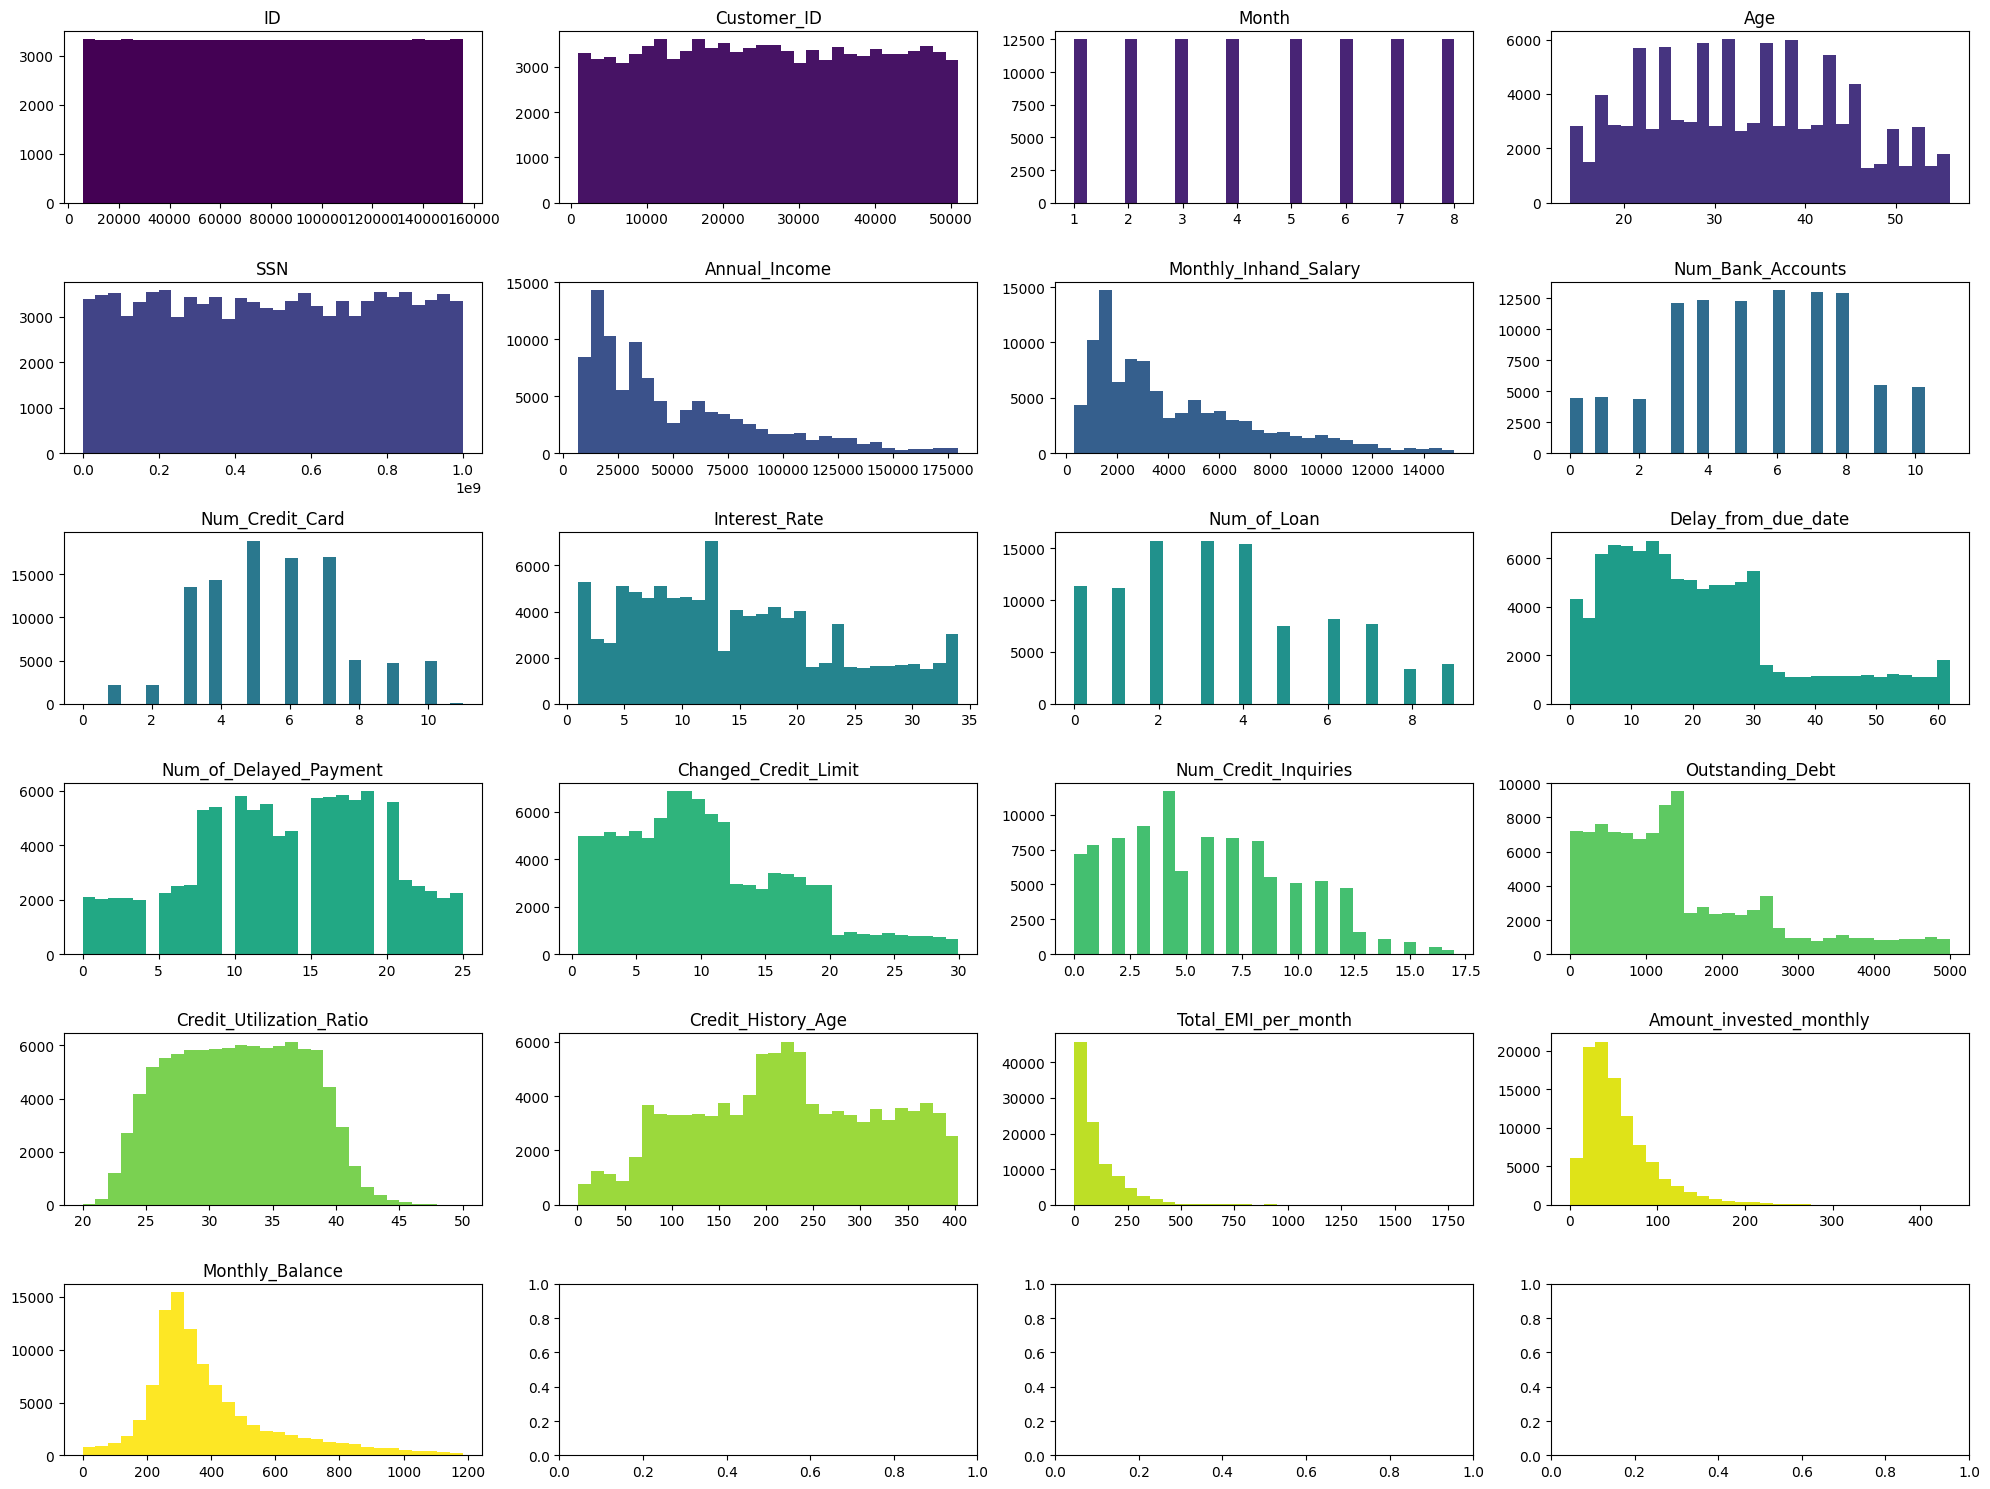

In [ ]:
# Distribution of numerical columns

graph = data.select_dtypes(include=['float64', 'int64'])
colors = plt.cm.viridis(np.linspace(0, 1, len(graph.columns)))
fig, axes = plt.subplots(len(graph.columns)//4 + 1, 4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(graph.columns):
    axes[i].hist(graph[col], bins=30, color=colors[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64


Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64


Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64


Payment_Behaviour
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: count, dtype: int64




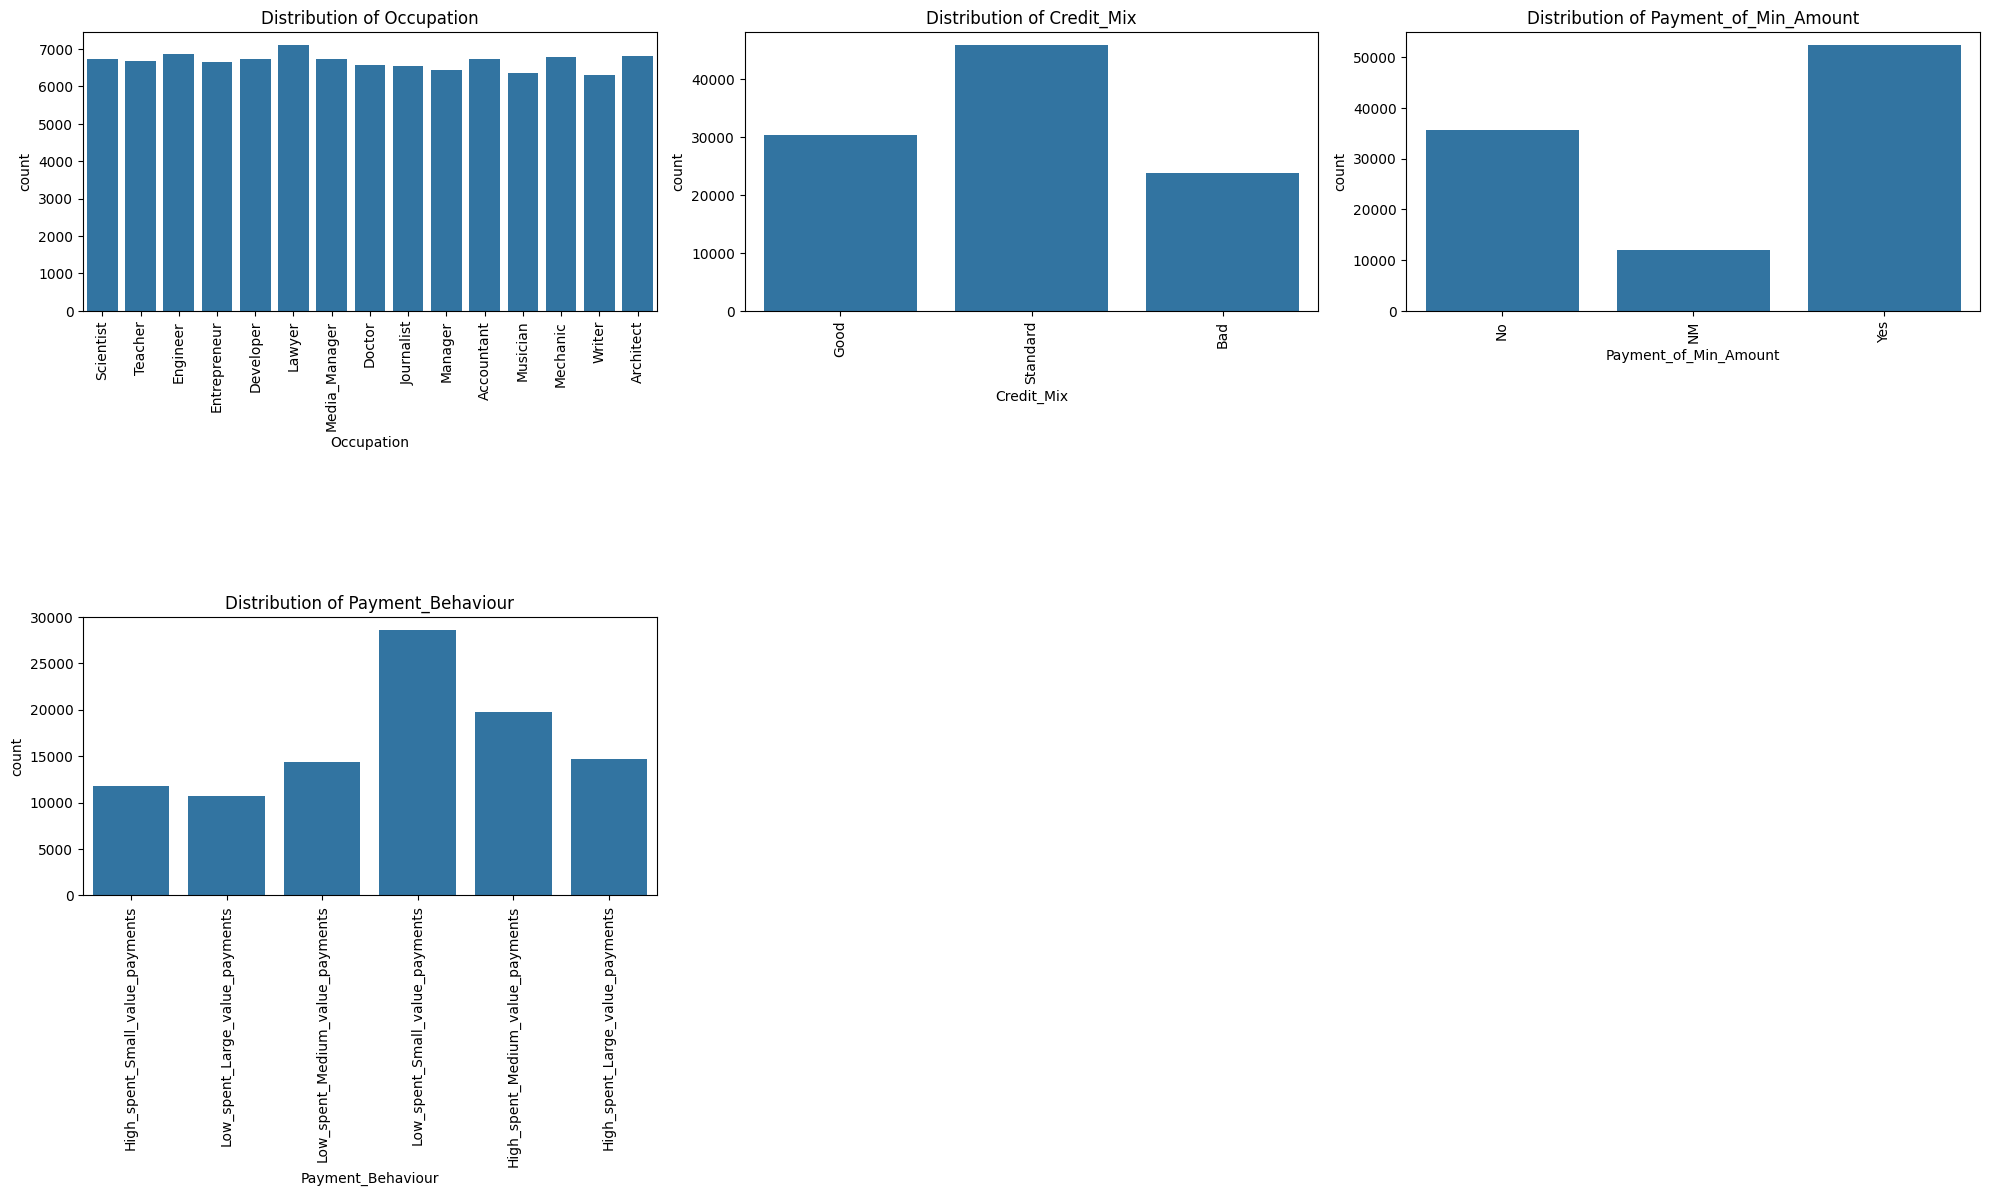

In [ ]:
# Univariate Analysis for Categorical Columns

categorical_cols = ['Occupation', 'Credit_Mix','Payment_of_Min_Amount', 'Payment_Behaviour']

# Frequency Distribution
for col in categorical_cols:
    print(data[col].value_counts())
    print("\n")

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

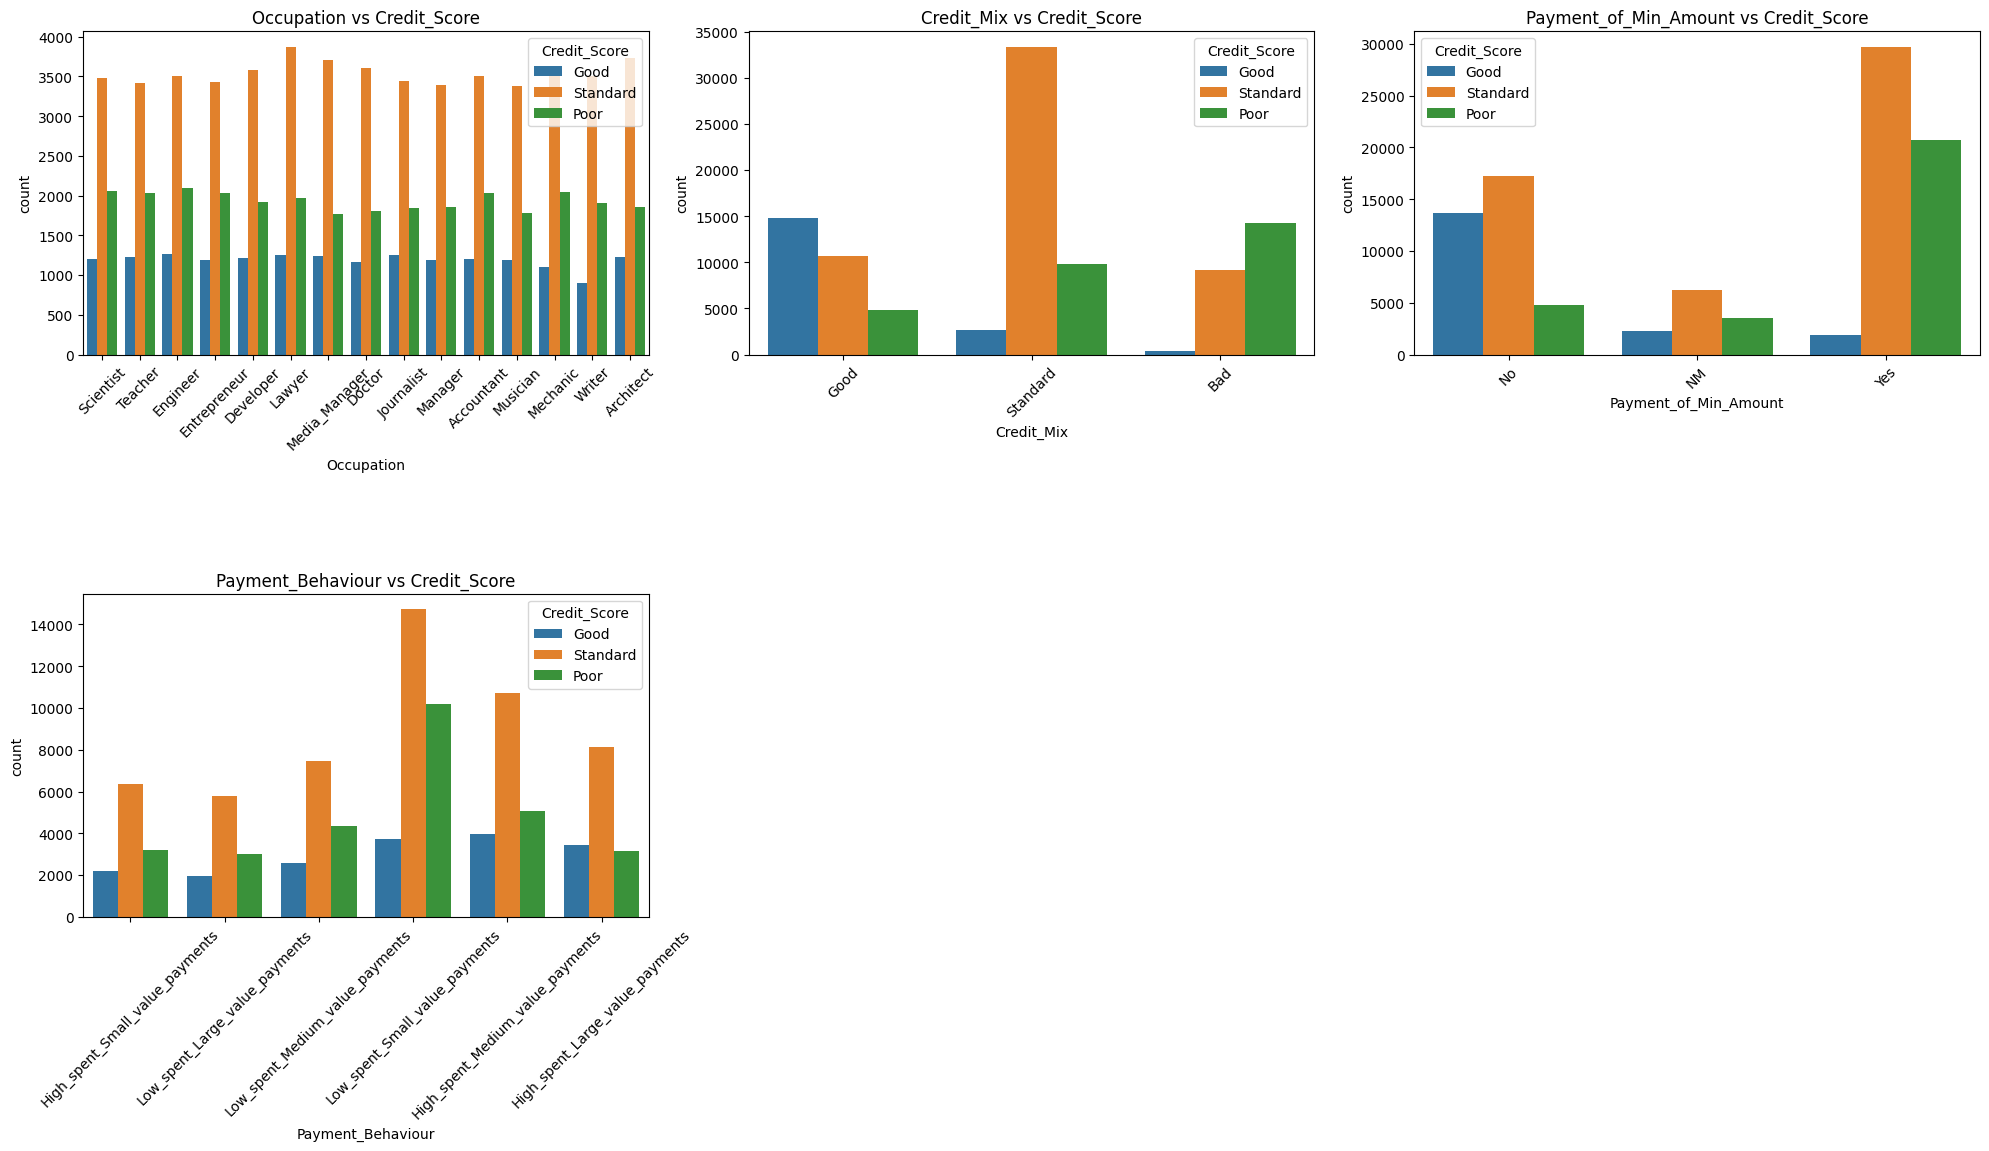

In [ ]:
# Relationship between categorical features and 'Credit_Score'

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=col, hue='Credit_Score')
    plt.title(f'{col} vs Credit_Score')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

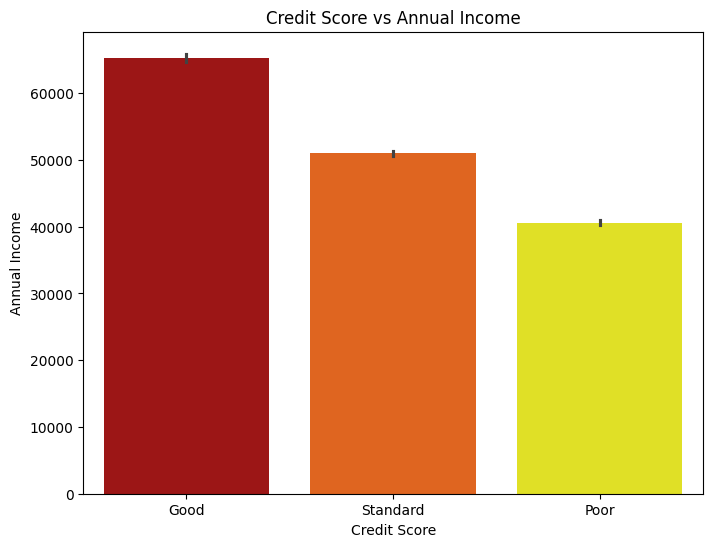

In [ ]:
# credit_score against annual income

plt.figure(figsize=(8, 6))
sns.barplot(x='Credit_Score', y='Annual_Income', data=data, palette='hot')
plt.title('Credit Score vs Annual Income')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.show()

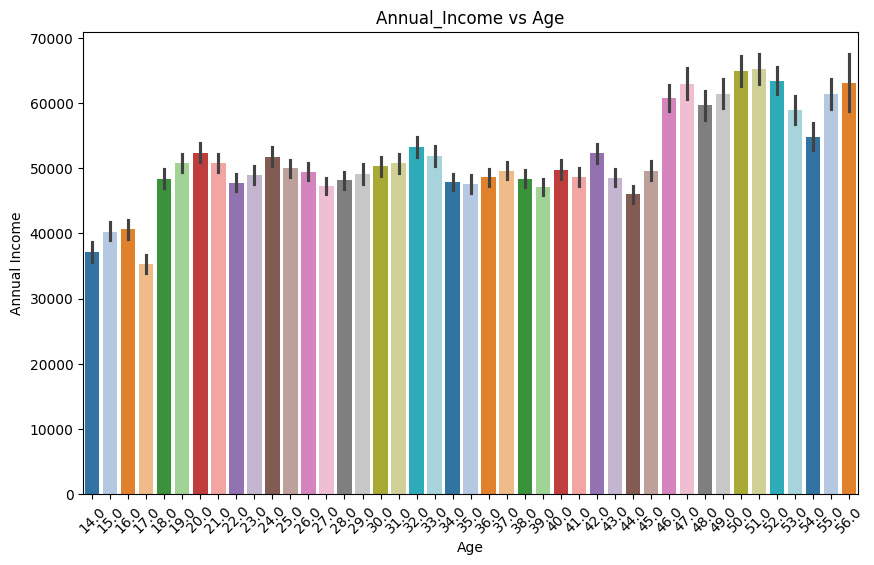

In [ ]:
# Annual_Income against age

plt.figure(figsize=(10,6))
sns.barplot(data=data, x="Age", y="Annual_Income", palette='tab20')
plt.title('Annual_Income vs Age')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)
plt.show()

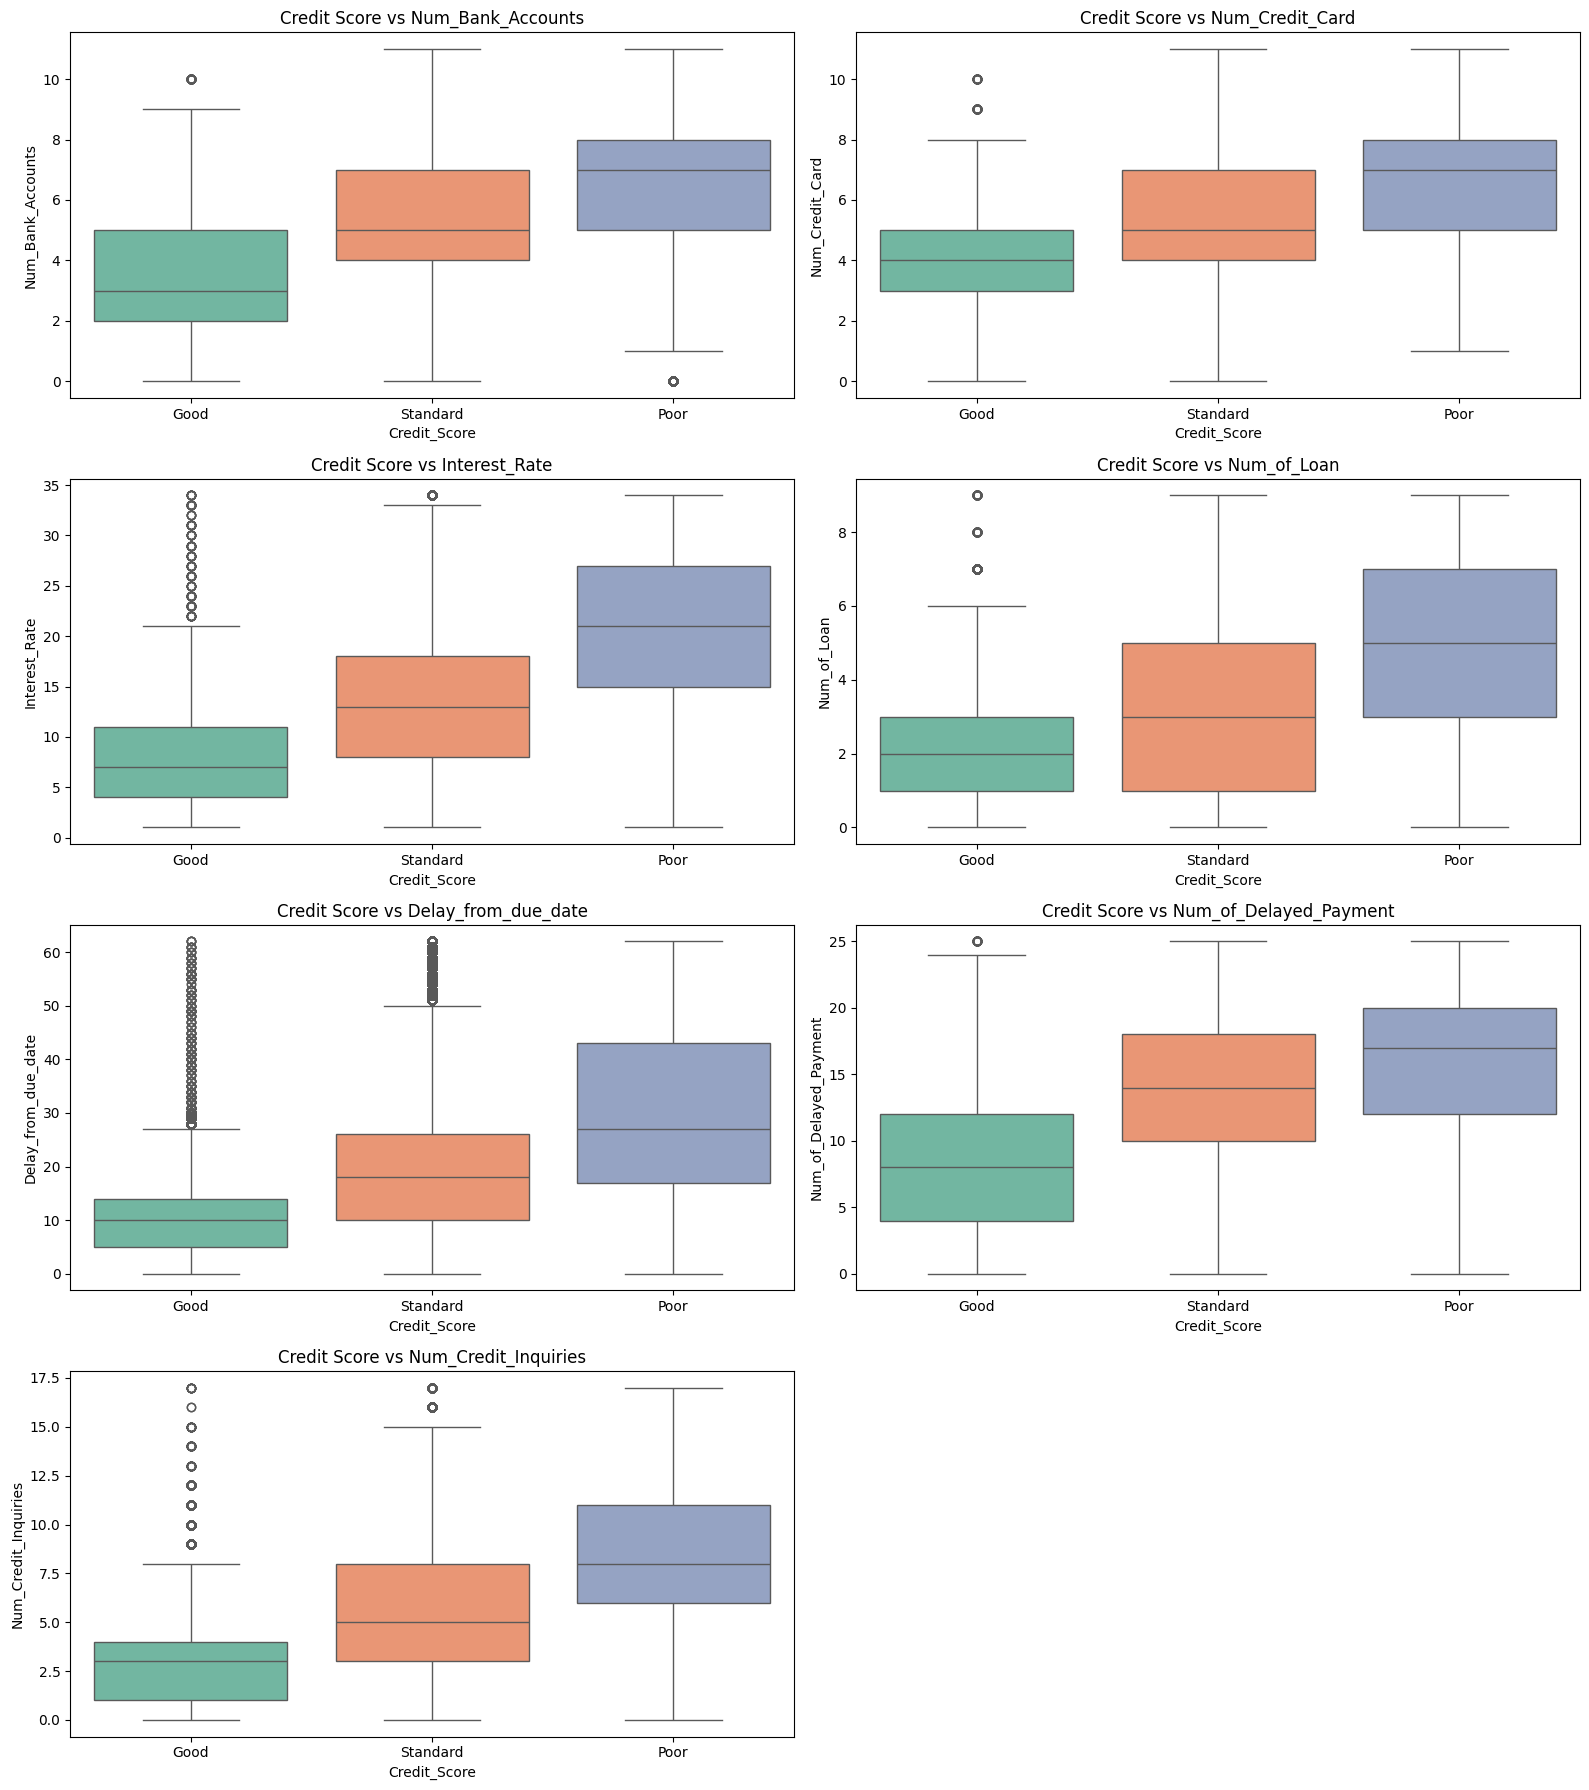

In [ ]:
 # Credit Score vs. Numerical Columns

numerical_cols = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']

plt.figure(figsize=(16, 18))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='Credit_Score', y=col, data=data, palette='Set2')
    plt.title(f'Credit Score vs {col}')

plt.tight_layout()
plt.show()

The credit score box plots show a trend: responsible credit behavior like having more bank accounts and credit cards (used wisely) and avoiding late payments is linked to higher credit scores.

Conversely, factors like having many loan inquiries or frequent delays in payments seem to be associated with lower credit scores.

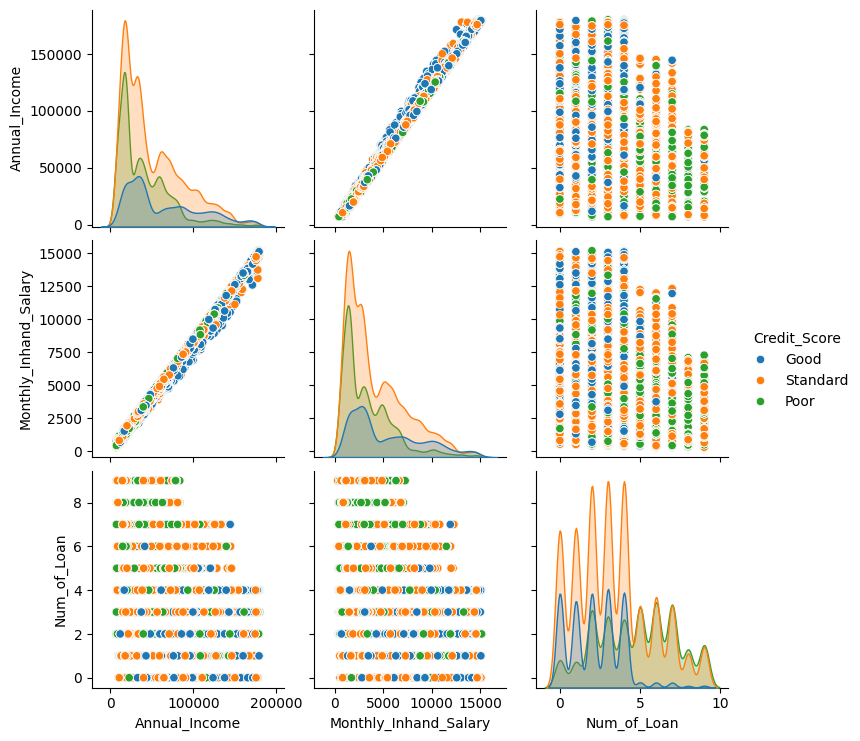

In [ ]:
# Distribution of Annual_Income, Monthly_Inhand_Salary, Num_of_Loan

sns.pairplot(data, hue='Credit_Score', vars=['Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan'])
plt.show()

**Annual Income vs. Monthly Inhand Salary:**
Strong linear relationship across all credit score categories.
As annual income increases, monthly in-hand salary increases proportionally.

**Annual Income vs. Number of Loans:**
No clear linear relationship; points are more dispersed.
Higher concentration of Poor credit scores at lower income levels.

**Monthly Inhand Salary vs. Number of Loans:**
Similar dispersion as Annual Income vs. Number of Loans.
No strong trend, but shows how loan numbers vary across salary levels and credit scores.

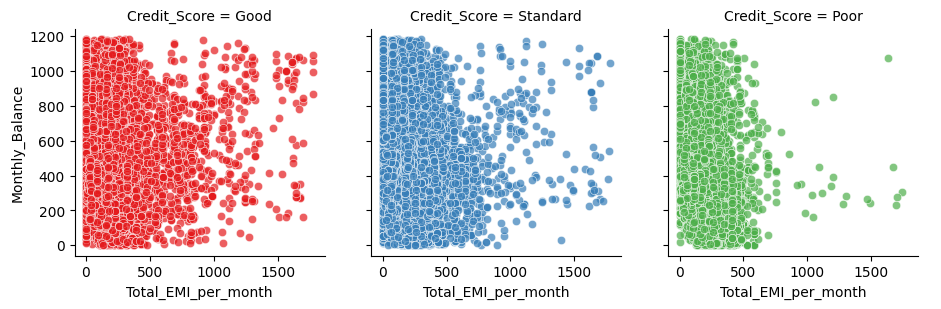

In [ ]:
# # Distribution of Monthly Financial Metrics

palette = sns.color_palette("Set1", 3)
g = sns.FacetGrid(data, col="Credit_Score")

for i, ax in enumerate(g.axes.flat):
    sns.scatterplot(data=data[data['Credit_Score'] == g.col_names[i]], x="Total_EMI_per_month", y="Monthly_Balance", color=palette[i], alpha=.7, ax=ax)

g.add_legend()
plt.show()

Individuals with a **good credit score** tend to have a higher spread in their Monthly_Balance and Total_EMI_per_month compared to those with standard or poor credit scores.

There is no clear linear relationship between Total_EMI_per_month and Monthly_Balance across different credit score categories.

People with a **poor credit score** typically have lower Total_EMI_per_month and Monthly_Balance values, indicating more financial constraints.

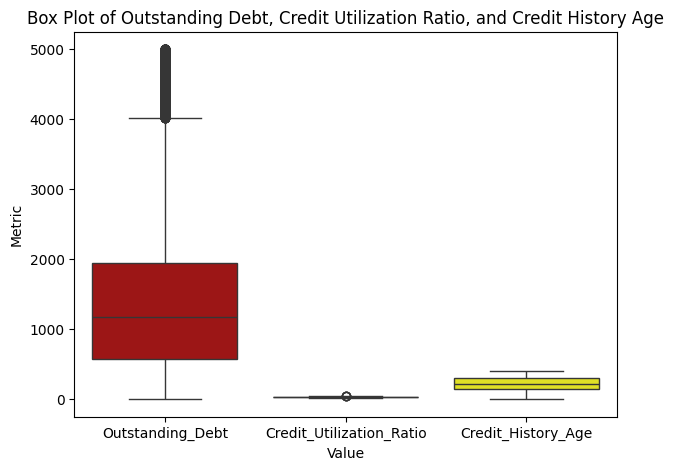

In [ ]:
# financial behavior of individuals

plt.figure(figsize=(7,5))
sns.boxplot(data=data[["Outstanding_Debt", "Credit_Utilization_Ratio","Credit_History_Age"]], palette = "hot")
plt.title('Box Plot of Outstanding Debt, Credit Utilization Ratio, and Credit History Age')
plt.xlabel('Value')
plt.ylabel('Metric')
plt.show()

**Outstanding Debt:** Most people have a median debt around 1000, with a wide range and some very high outliers.

**Credit Utilization Ratio**: Most people use very little of their available credit, with values close to 0.

**Credit History Age:** Credit history length varies widely, with a median around 10 years.

These insights show that individuals with high outstanding debt and long credit histories may be experienced credit users, while low credit utilization ratios suggest careful credit management.

## **Data Preprocessing**

In [ ]:
# Removing columns which do not provide any valuable insights for the analysis

columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'Age','Occupation','SSN', 'Type_of_Loan']
data = data.drop(columns_to_drop, axis=1)

In [ ]:
data.shape

(100000, 20)

In [ ]:
# Checking for duplicates

duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [ ]:
# Checking for missing values

data.isna().sum()

Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

There is no duplicates and missing values found in the data

### **Handling missing values**

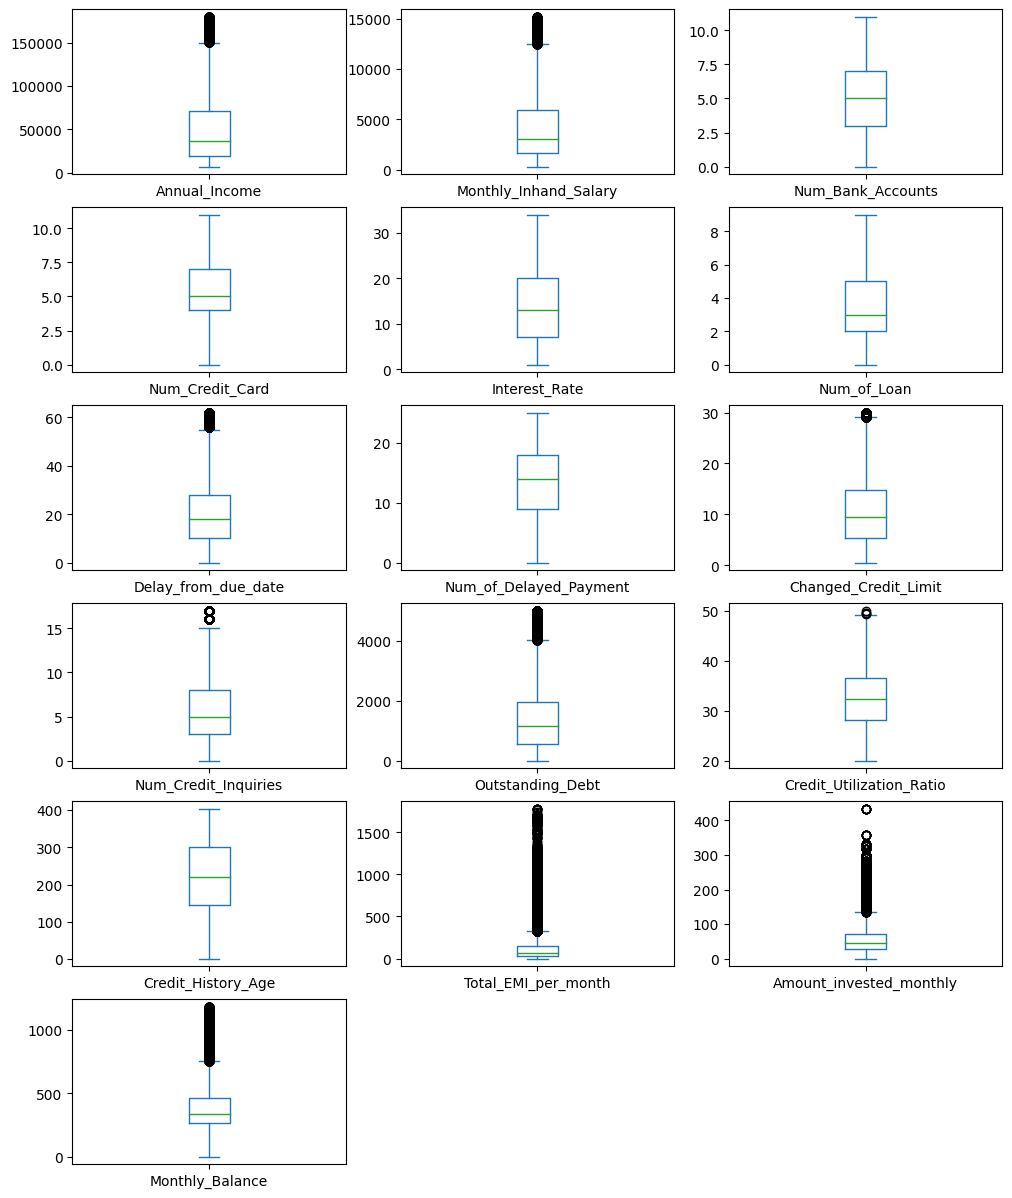

In [ ]:
# Outlier detection

data.plot(kind='box', figsize= (12, 15), layout= (6, 3) , sharex= False, subplots= True);

Columns "Delay_from_due_date" and "number_of_credit_inquiries" are discrete numerical columns, so no need to handle the outliers.

The other continuous columns have skewed distribution, therefore IQR method can be done.

In [ ]:
# Handling outliers

columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit','Outstanding_Debt',
       'Credit_Utilization_Ratio','Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']

def handle_outliers(data, columns):
  for x in columns:
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR

    # clipping
    data[x] = data[x].clip(lower=lower_lim, upper=upper_lim)
    outliers = data[(data[x] < lower_lim) | (data[x] > upper_lim)]

  return data


data = handle_outliers(data,columns)

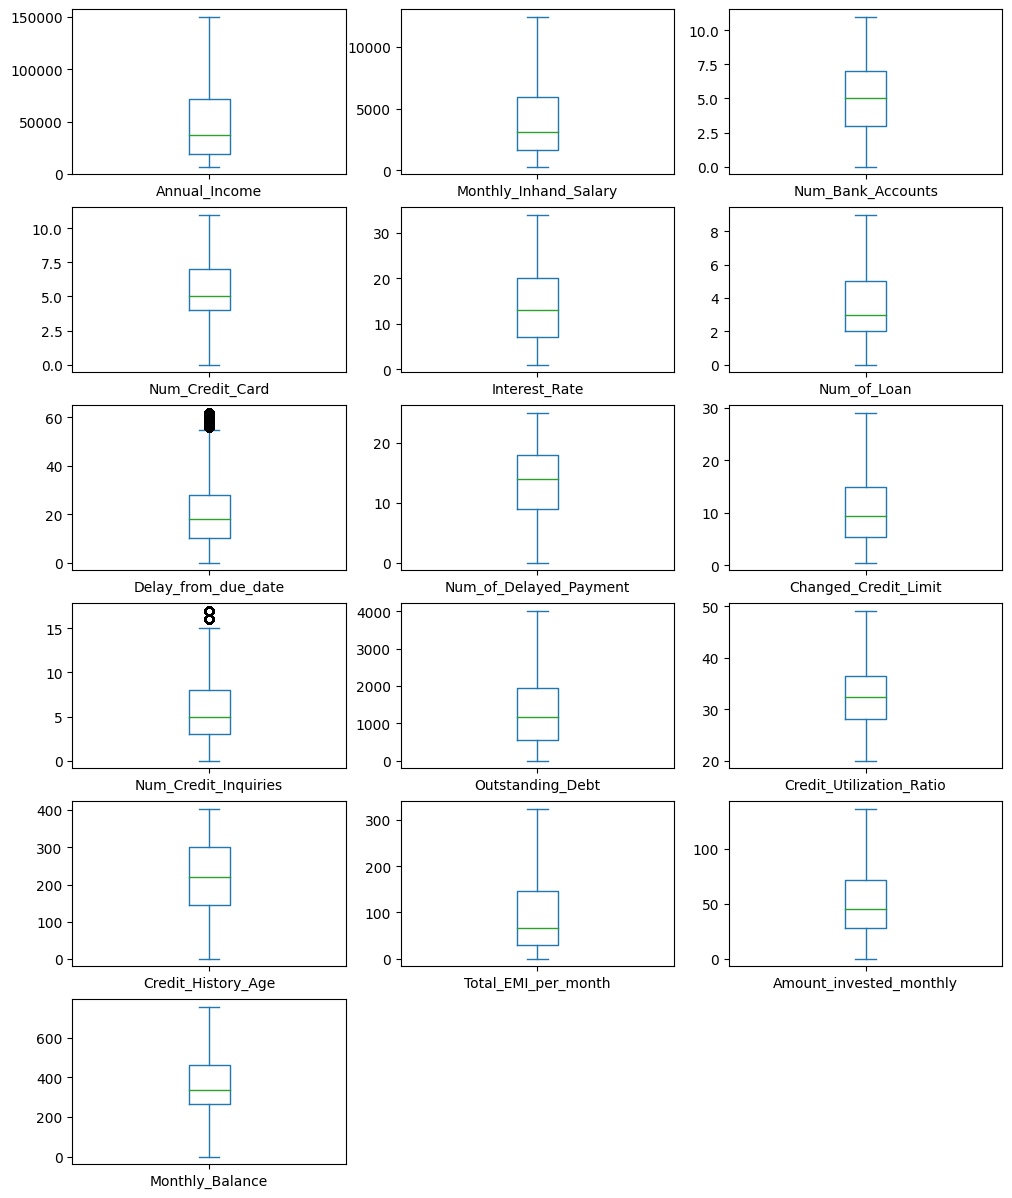

In [ ]:
data.plot(kind='box', figsize= (12, 15), layout= (6, 3) , sharex= False, subplots= True);

### **Encoding**

In [ ]:
# Ordinal Encoding

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data['Credit_Mix'] = ordinal_encoder.fit_transform(data[['Credit_Mix']])

In [ ]:
data['Payment_Behaviour'] = ordinal_encoder.fit_transform(data[['Payment_Behaviour']])
data['Payment_of_Min_Amount'] = ordinal_encoder.fit_transform(data[['Payment_of_Min_Amount']])

The **Credit_Mix** column is done with ordinal encoding. Because the column have a natural order(Bad < Standard < Good).



In [ ]:
data.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1.0,809.98,26.822620,265.0,1.0,49.574949,21.46538,2.0,312.494089,Good
1,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,1.0,809.98,31.944960,266.0,1.0,49.574949,21.46538,3.0,284.629162,Good
2,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1.0,809.98,28.609352,267.0,1.0,49.574949,21.46538,4.0,331.209863,Good
3,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,1.0,809.98,31.377862,268.0,1.0,49.574949,21.46538,5.0,223.451310,Good
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,1.0,809.98,24.797347,269.0,1.0,49.574949,21.46538,1.0,341.489231,Good


### **Correlation**

In [ ]:
# Mapping Credit_Score to numerical values
credit_map = {"Good": 1, "Standard": 2, "Poor": 3}
data['Credit_Score_Numeric'] = data['Credit_Score'].replace(credit_map)

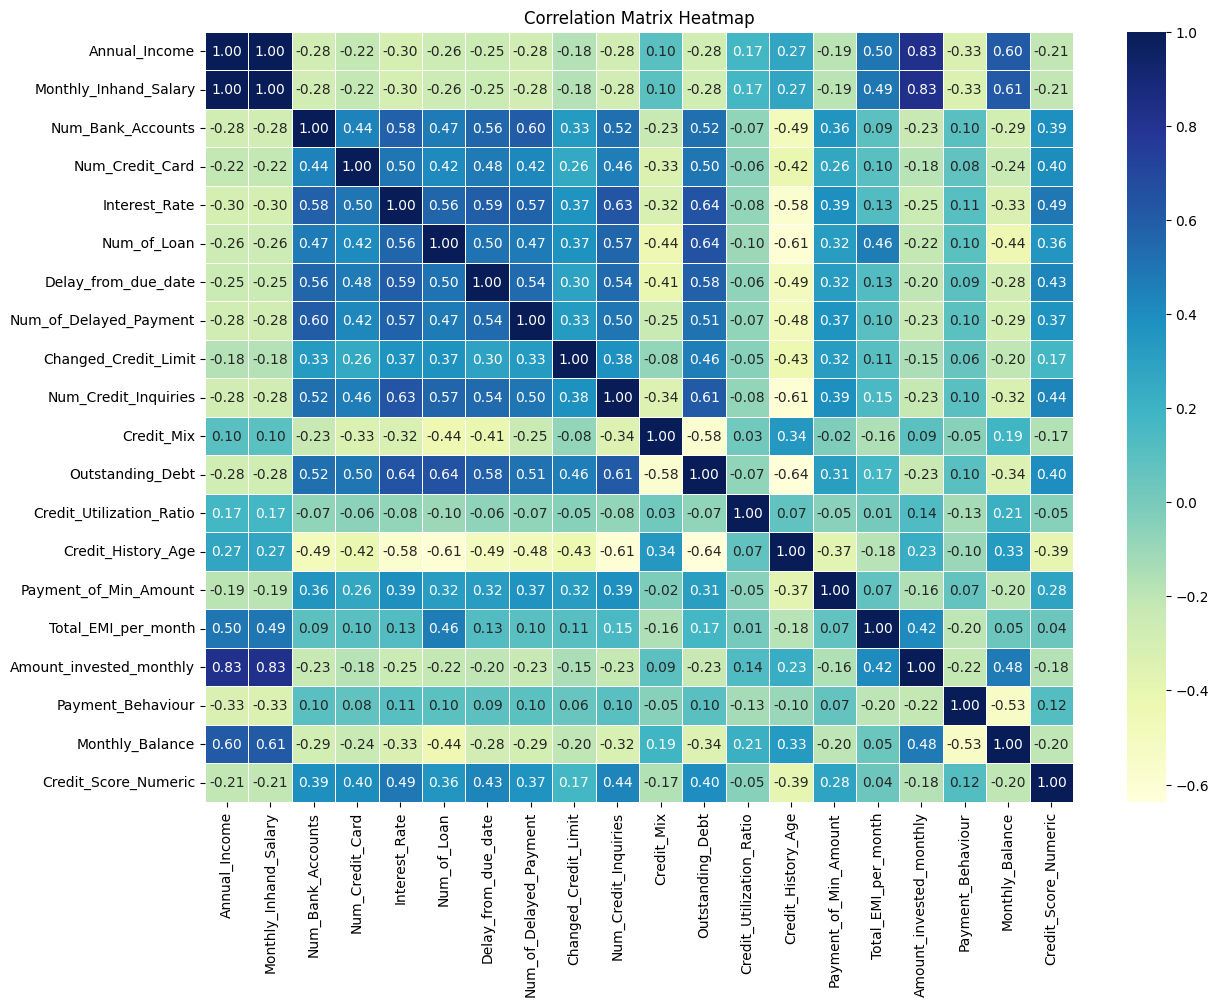

In [ ]:
# Calculate correlation matrix using only numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Define the correlation threshold
correlation_threshold = 0.8

# Filter the correlation matrix to include only highly correlated pairs
highly_correlated = correlation_matrix[(correlation_matrix > correlation_threshold) & (correlation_matrix < 1)]

# Print highly correlated data
print("Highly Correlated Data:")
for col in highly_correlated:
    correlated_vars = highly_correlated[col][highly_correlated[col].notnull()]
    for idx, val in correlated_vars.items():
      print(f"{col} and {idx}: {val:.2f}")

Highly Correlated Data:
Annual_Income and Monthly_Inhand_Salary: 1.00
Annual_Income and Amount_invested_monthly: 0.83
Monthly_Inhand_Salary and Annual_Income: 1.00
Monthly_Inhand_Salary and Amount_invested_monthly: 0.83
Amount_invested_monthly and Annual_Income: 0.83
Amount_invested_monthly and Monthly_Inhand_Salary: 0.83


Based on the heatmap, we can see some high correlations (greater than 0.8) between predictors.

**Annual_Income** is highly correlated with both **Monthly_Inhand_Salary** and **Amount_invested_monthly**, can choose to retain Annual_Income and drop the other two columns.

Because Annual_Income might be a more straightforward.
Dropping Monthly_Inhand_Salary and Amount_invested_monthly removes redundancy.



In [ ]:
# Drop highly correlated columns
columns_to_drop = ['Monthly_Inhand_Salary', 'Amount_invested_monthly']
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Mapping back to categorical values
inverse_credit_map = {1: "Good", 2: "Standard", 3: "Poor"}
data['Credit_Score'] = data['Credit_Score_Numeric'].replace(inverse_credit_map)

# Drop the temporary numeric column if needed
data.drop(columns=['Credit_Score_Numeric'], inplace=True)

In [ ]:
data.shape

(100000, 18)

### **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_standardise = ['Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
        'Monthly_Balance',]

scaler = StandardScaler()
data[columns_to_standardise] = scaler.fit_transform(data[columns_to_standardise])

### **Splitting data into training, validation, and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Credit_Score', axis=1)
y = data['Credit_Score']

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split training data into training (70%) and validation (10%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (72000, 17) (72000,)
Validation set: (8000, 17) (8000,)
Testing set: (20000, 17) (20000,)


### **Feature Importance using Random Forest**

Tree-based models like Random Forest can be used to identify the importance of different features in a dataset by measuring the impact of each feature on the prediction accuracy. These models work by constructing multiple decision trees during training and averaging their results to improve accuracy and control over-fitting. Feature importance is derived by evaluating how much each feature decreases the impurity in the data splits, with more significant features resulting in greater decreases in impurity. This method helps in selecting the most relevant features for the model, improving both efficiency and performance.

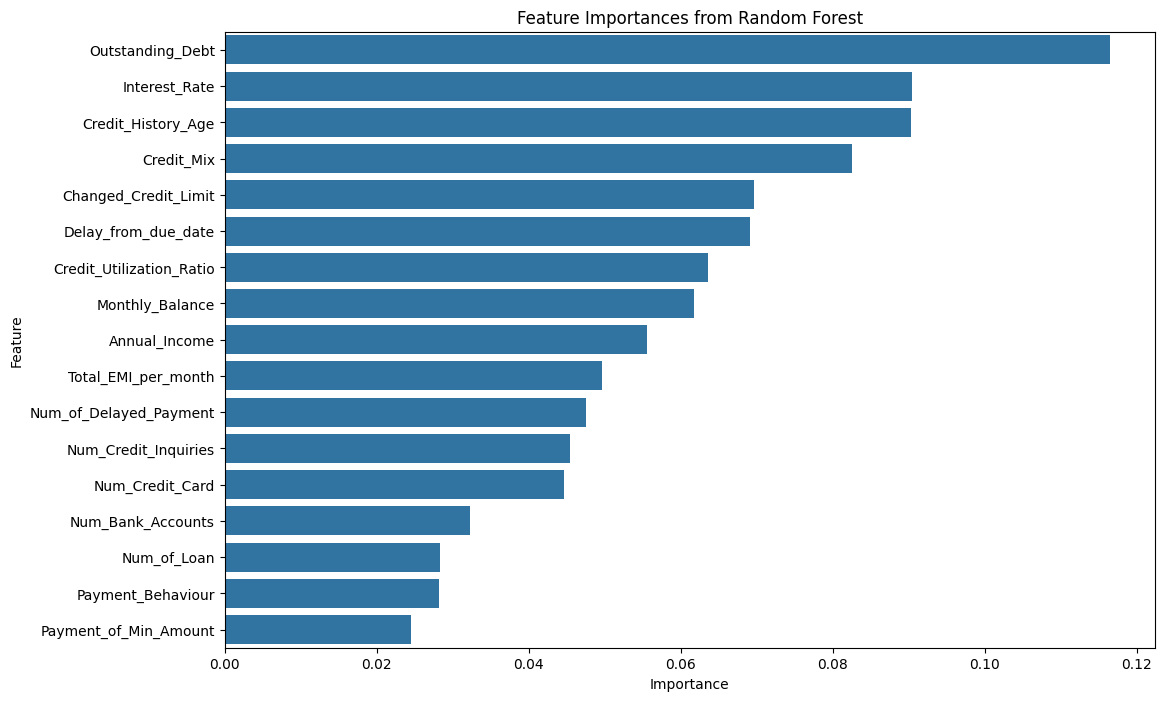

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()


1.  Outstanding_Debt
2.  Interest_Rate
3.  Credit_History_Age
4. Credit_Mix
5. Changed_Credit_Limit
6.  Delay_from_due_date
7.   Credit_Utilization_Ratio
8.  Monthly_Balance
9.  Annual_Income

These features have the highest importance scores and should provide the most predictive power for the model.




In [ ]:
important_features = ['Outstanding_Debt', 'Interest_Rate', 'Credit_History_Age', 'Credit_Mix',
                      'Changed_Credit_Limit', 'Delay_from_due_date', 'Credit_Utilization_Ratio',
                      'Monthly_Balance', 'Annual_Income']

X_train_selected = X_train[important_features]
X_val_selected = X_val[important_features]
X_test_selected = X_test[important_features]

### **Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train_selected, y_train)

# Validate the model
y_val_pred = rf.predict(X_val_selected)
print("Random Forest - Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Random Forest - Validation Accuracy: 0.788375
              precision    recall  f1-score   support

        Good       0.72      0.74      0.73      1417
        Poor       0.78      0.80      0.79      2239
    Standard       0.82      0.80      0.81      4344

    accuracy                           0.79      8000
   macro avg       0.77      0.78      0.78      8000
weighted avg       0.79      0.79      0.79      8000



### **Gradient boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb = GradientBoostingClassifier(random_state=42)

# Train the model
gb.fit(X_train_selected, y_train)

# Validate the model
y_val_pred = gb.predict(X_val_selected)
print("Gradient Boosting - Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Gradient Boosting - Validation Accuracy: 0.699375
              precision    recall  f1-score   support

        Good       0.52      0.77      0.62      1417
        Poor       0.71      0.65      0.68      2239
    Standard       0.79      0.70      0.74      4344

    accuracy                           0.70      8000
   macro avg       0.67      0.71      0.68      8000
weighted avg       0.72      0.70      0.70      8000



### **Support vector machine**

In [ ]:
from sklearn.svm import SVC

# Initialize the model
svm = SVC(random_state=42)

# Train the model
svm.fit(X_train_selected, y_train)

# Validate the model
y_val_pred = svm.predict(X_val_selected)
print("SVM - Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

SVM - Validation Accuracy: 0.6895
              precision    recall  f1-score   support

        Good       0.49      0.82      0.62      1417
        Poor       0.73      0.59      0.66      2239
    Standard       0.79      0.70      0.74      4344

    accuracy                           0.69      8000
   macro avg       0.67      0.70      0.67      8000
weighted avg       0.72      0.69      0.69      8000



### **Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
lr = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
lr.fit(X_train_selected, y_train)

# Validate the model
y_val_pred = lr.predict(X_val_selected)
print("Logistic Regression - Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))


Logistic Regression - Validation Accuracy: 0.627125
              precision    recall  f1-score   support

        Good       0.52      0.50      0.51      1417
        Poor       0.63      0.49      0.55      2239
    Standard       0.65      0.74      0.70      4344

    accuracy                           0.63      8000
   macro avg       0.60      0.58      0.59      8000
weighted avg       0.62      0.63      0.62      8000



### **kNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train_selected, y_train)

# Validate the model
y_val_pred = knn.predict(X_val_selected)
print("k-NN - Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

k-NN - Validation Accuracy: 0.691875
              precision    recall  f1-score   support

        Good       0.54      0.60      0.57      1417
        Poor       0.68      0.66      0.67      2239
    Standard       0.75      0.74      0.74      4344

    accuracy                           0.69      8000
   macro avg       0.66      0.67      0.66      8000
weighted avg       0.70      0.69      0.69      8000

